In [7]:
import tensorflow.keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

In [8]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('sequence padding (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train size:', input_train.shape)
print('input_test size:', input_test.shape)

25000 train sequence
25000 test sequence
sequence padding (samples x time)
input_train size: (25000, 500)
input_test size: (25000, 500)


In [73]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 121ms/step - loss: 0.6178 - acc: 0.6578 - val_loss: 0.4737 - val_acc: 0.8186
Epoch 2/10
157/157 [==============================] - 14s 88ms/step - loss: 0.3769 - acc: 0.8457 - val_loss: 0.5989 - val_acc: 0.7474
Epoch 3/10
157/157 [==============================] - 14s 89ms/step - loss: 0.2944 - acc: 0.8840 - val_loss: 0.4500 - val_acc: 0.7780
Epoch 4/10
157/157 [==============================] - 14s 88ms/step - loss: 0.2233 - acc: 0.9151 - val_loss: 0.3524 - val_acc: 0.8626
Epoch 5/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1796 - acc: 0.9341 - val_loss: 0.3555 - val_acc: 0.8764
Epoch 6/10
157/157 [==============================] - 14s 89ms/step - loss: 0.1467 - acc: 0.9470 - val_loss: 0.3634 - val_acc: 0.8526
Epoch 7/10
157/157 [==============================] - 14s 88ms/step - loss: 0.1096 - acc: 0.9635 - val_loss: 0.4319 - val_acc: 0.8376
Epoch 8/10
157/157 [==============================] - 14s 89m

In [78]:
def plot():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    results = model.evaluate(input_test, y_test)
    results

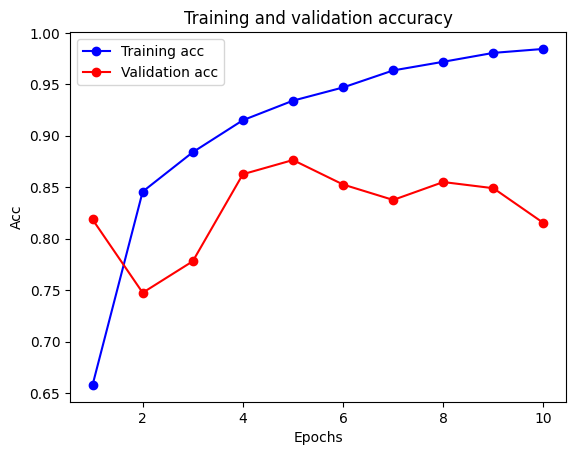

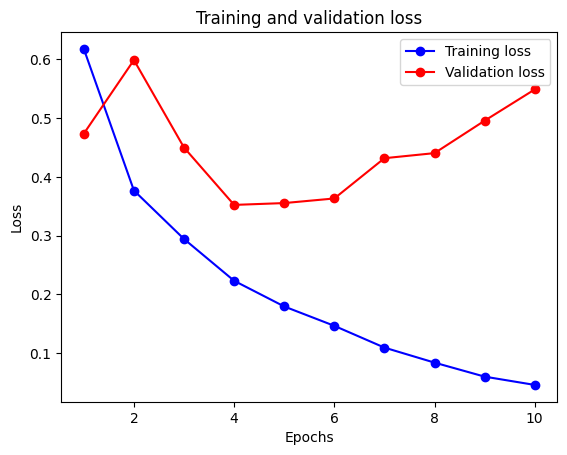

782/782 [==============================] - 13s 17ms/step - loss: 0.5848 - acc: 0.8056


In [79]:
plot()

Epoch 1/10
157/157 [==============================] - 35s 211ms/step - loss: 0.5111 - acc: 0.7623 - val_loss: 0.3829 - val_acc: 0.8368
Epoch 2/10
157/157 [==============================] - 33s 209ms/step - loss: 0.3075 - acc: 0.8786 - val_loss: 0.2890 - val_acc: 0.8806
Epoch 3/10
157/157 [==============================] - 33s 209ms/step - loss: 0.2364 - acc: 0.9099 - val_loss: 0.2818 - val_acc: 0.8846
Epoch 4/10
157/157 [==============================] - 33s 210ms/step - loss: 0.2028 - acc: 0.9255 - val_loss: 0.4475 - val_acc: 0.8294
Epoch 5/10
157/157 [==============================] - 33s 209ms/step - loss: 0.1766 - acc: 0.9369 - val_loss: 0.3010 - val_acc: 0.8814
Epoch 6/10
157/157 [==============================] - 33s 210ms/step - loss: 0.1633 - acc: 0.9427 - val_loss: 0.2969 - val_acc: 0.8796
Epoch 7/10
157/157 [==============================] - 33s 210ms/step - loss: 0.1466 - acc: 0.9478 - val_loss: 0.4626 - val_acc: 0.8486
Epoch 8/10
157/157 [==============================] - 3

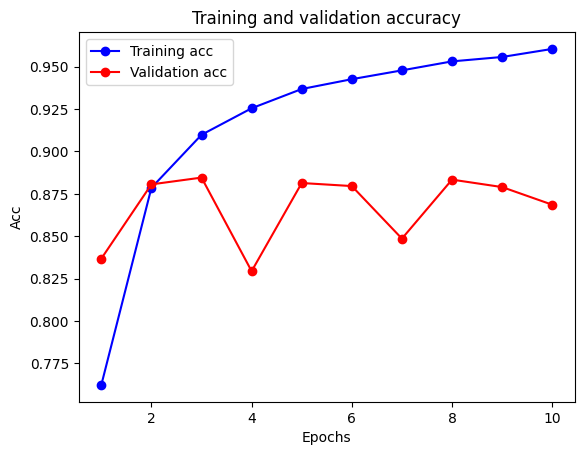

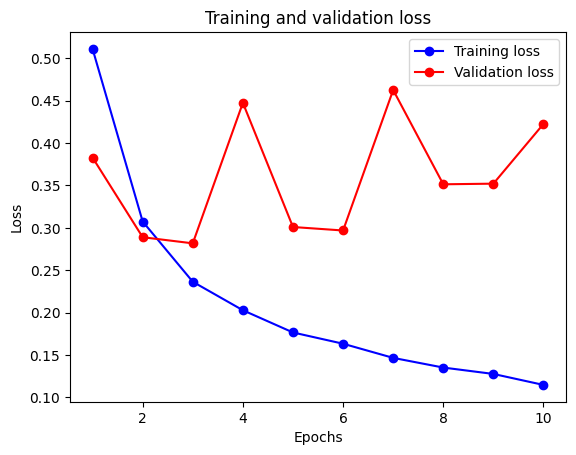

782/782 [==============================] - 28s 36ms/step - loss: 0.5016 - acc: 0.8422


In [80]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

In [81]:
from tensorflow.keras.layers import GRU

Epoch 1/10
157/157 [==============================] - 38s 228ms/step - loss: 0.5299 - acc: 0.7209 - val_loss: 0.3957 - val_acc: 0.8264
Epoch 2/10
157/157 [==============================] - 37s 233ms/step - loss: 0.3068 - acc: 0.8749 - val_loss: 0.4337 - val_acc: 0.8596
Epoch 3/10
157/157 [==============================] - 34s 219ms/step - loss: 0.2508 - acc: 0.9015 - val_loss: 0.3042 - val_acc: 0.8778
Epoch 4/10
157/157 [==============================] - 30s 193ms/step - loss: 0.2156 - acc: 0.9183 - val_loss: 0.3859 - val_acc: 0.8410
Epoch 5/10
157/157 [==============================] - 30s 189ms/step - loss: 0.1973 - acc: 0.9263 - val_loss: 0.3669 - val_acc: 0.8556
Epoch 6/10
157/157 [==============================] - 29s 182ms/step - loss: 0.1798 - acc: 0.9336 - val_loss: 0.3214 - val_acc: 0.8808
Epoch 7/10
157/157 [==============================] - 28s 179ms/step - loss: 0.1588 - acc: 0.9423 - val_loss: 0.3609 - val_acc: 0.8772
Epoch 8/10
157/157 [==============================] - 2

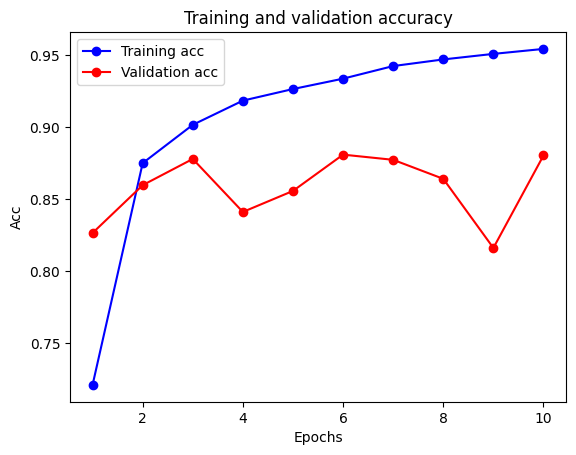

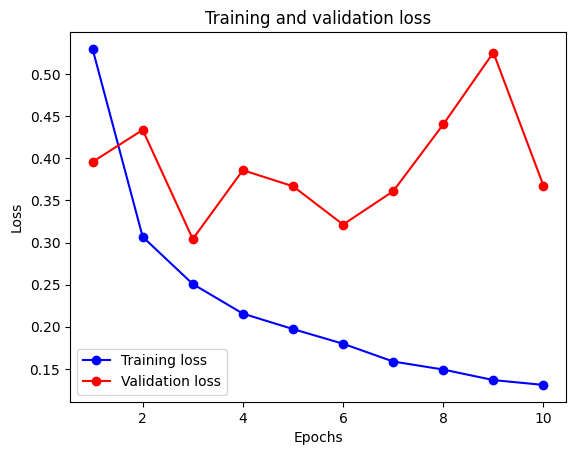

782/782 [==============================] - 20s 25ms/step - loss: 0.4172 - acc: 0.8621


In [8]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

In [77]:
from tensorflow.keras.layers import Bidirectional

Epoch 1/10
157/157 [==============================] - 68s 412ms/step - loss: 0.5277 - acc: 0.7445 - val_loss: 0.3677 - val_acc: 0.8528
Epoch 2/10
157/157 [==============================] - 64s 407ms/step - loss: 0.3078 - acc: 0.8809 - val_loss: 0.6449 - val_acc: 0.7830
Epoch 3/10
157/157 [==============================] - 64s 407ms/step - loss: 0.2450 - acc: 0.9079 - val_loss: 0.3065 - val_acc: 0.8704
Epoch 4/10
157/157 [==============================] - 64s 411ms/step - loss: 0.2081 - acc: 0.9225 - val_loss: 0.3487 - val_acc: 0.8718
Epoch 5/10
157/157 [==============================] - 64s 406ms/step - loss: 0.1809 - acc: 0.9353 - val_loss: 0.3103 - val_acc: 0.8880
Epoch 6/10
157/157 [==============================] - 64s 406ms/step - loss: 0.1605 - acc: 0.9417 - val_loss: 0.3107 - val_acc: 0.8856
Epoch 7/10
157/157 [==============================] - 64s 405ms/step - loss: 0.1481 - acc: 0.9474 - val_loss: 0.3865 - val_acc: 0.8552
Epoch 8/10
157/157 [==============================] - 6

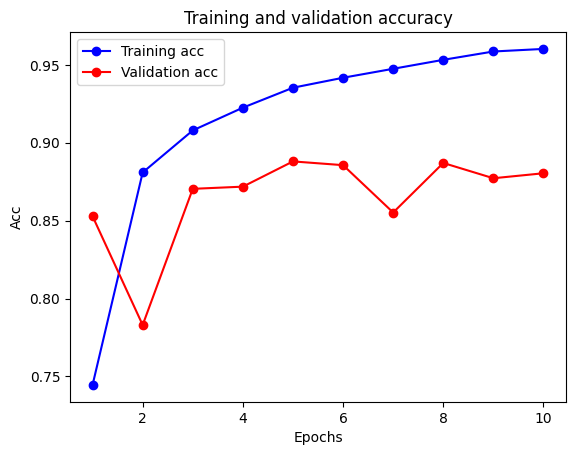

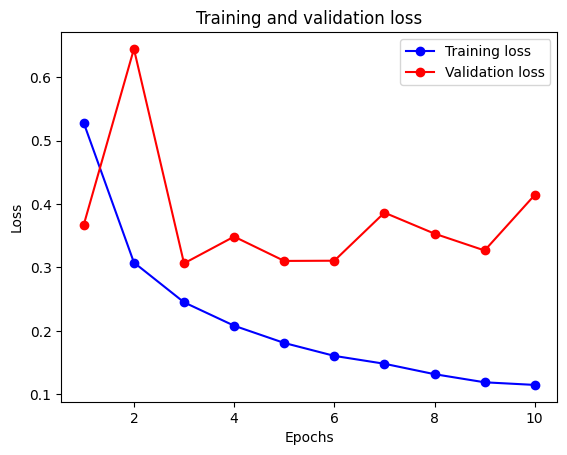

782/782 [==============================] - 24s 31ms/step - loss: 0.4609 - acc: 0.8635


In [10]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

Epoch 1/10
157/157 [==============================] - 108s 665ms/step - loss: 0.5698 - acc: 0.6992 - val_loss: 0.4020 - val_acc: 0.8308
Epoch 2/10
157/157 [==============================] - 109s 696ms/step - loss: 0.3709 - acc: 0.8411 - val_loss: 0.4383 - val_acc: 0.7934
Epoch 3/10
157/157 [==============================] - 95s 602ms/step - loss: 0.2969 - acc: 0.8817 - val_loss: 0.3488 - val_acc: 0.8586
Epoch 4/10
157/157 [==============================] - 94s 600ms/step - loss: 0.2405 - acc: 0.9064 - val_loss: 0.3269 - val_acc: 0.8692
Epoch 5/10
157/157 [==============================] - 97s 619ms/step - loss: 0.2093 - acc: 0.9217 - val_loss: 0.3363 - val_acc: 0.8652
Epoch 6/10
157/157 [==============================] - 83s 529ms/step - loss: 0.1828 - acc: 0.9326 - val_loss: 0.3349 - val_acc: 0.8736
Epoch 7/10
157/157 [==============================] - 89s 564ms/step - loss: 0.1660 - acc: 0.9413 - val_loss: 0.4165 - val_acc: 0.8688
Epoch 8/10
157/157 [==============================] -

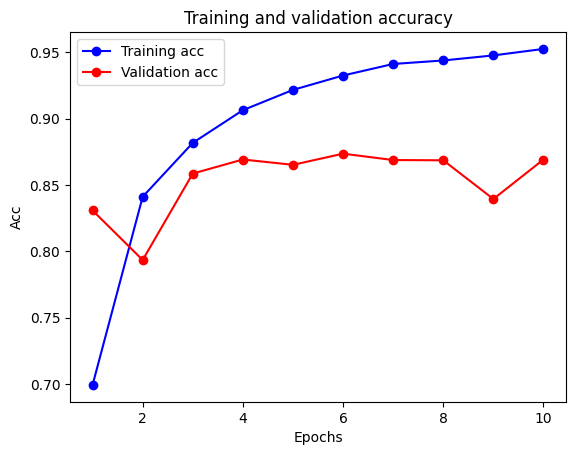

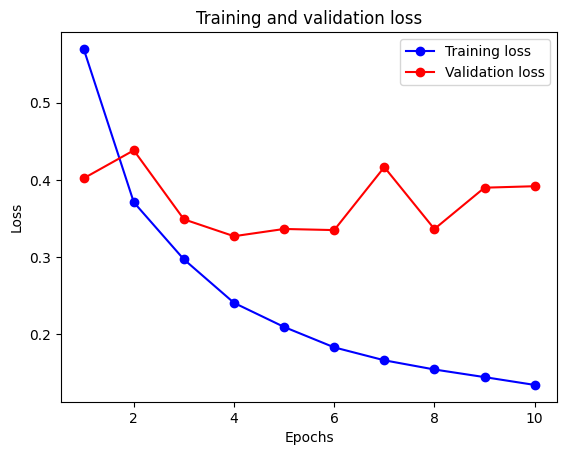

782/782 [==============================] - 39s 50ms/step - loss: 0.4629 - acc: 0.8458


In [11]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

Epoch 1/10
157/157 [==============================] - 35s 207ms/step - loss: 0.6311 - acc: 0.6249 - val_loss: 0.4665 - val_acc: 0.7930
Epoch 2/10
157/157 [==============================] - 23s 146ms/step - loss: 0.4039 - acc: 0.8314 - val_loss: 0.3891 - val_acc: 0.8308
Epoch 3/10
157/157 [==============================] - 24s 152ms/step - loss: 0.3050 - acc: 0.8787 - val_loss: 0.8736 - val_acc: 0.6912
Epoch 4/10
157/157 [==============================] - 26s 166ms/step - loss: 0.2593 - acc: 0.9003 - val_loss: 0.3666 - val_acc: 0.8460
Epoch 5/10
157/157 [==============================] - 20s 124ms/step - loss: 0.2099 - acc: 0.9204 - val_loss: 0.4800 - val_acc: 0.7622
Epoch 6/10
157/157 [==============================] - 24s 151ms/step - loss: 0.1803 - acc: 0.9330 - val_loss: 0.3914 - val_acc: 0.8646
Epoch 7/10
157/157 [==============================] - 26s 162ms/step - loss: 0.1415 - acc: 0.9507 - val_loss: 0.4682 - val_acc: 0.8540
Epoch 8/10
157/157 [==============================] - 2

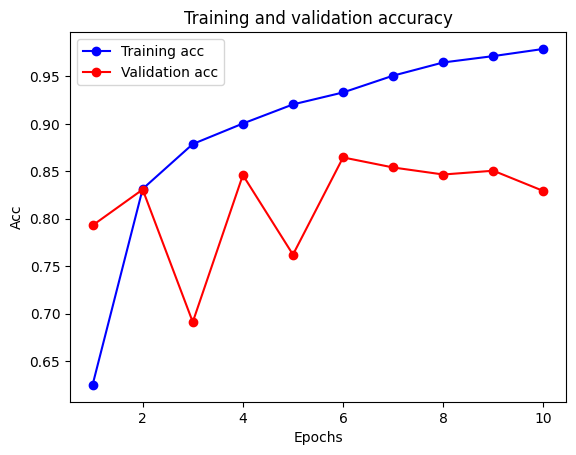

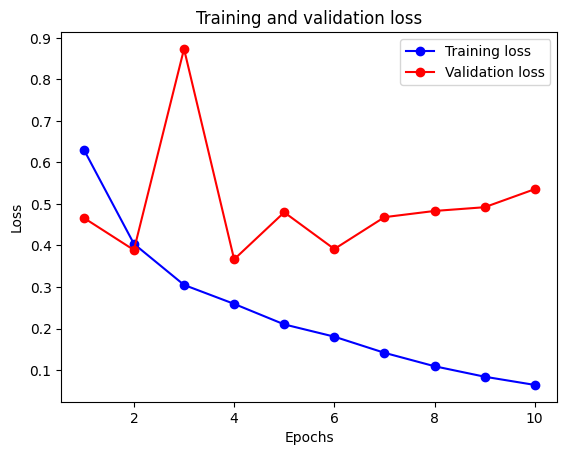

782/782 [==============================] - 12s 15ms/step - loss: 0.5339 - acc: 0.8246


In [12]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(SimpleRNN(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

In [68]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, optimizers, losses

Epoch 1/10
157/157 [==============================] - 37s 222ms/step - loss: 0.5732 - acc: 0.7024 - val_loss: 0.3606 - val_acc: 0.8524
Epoch 2/10
157/157 [==============================] - 32s 202ms/step - loss: 0.2875 - acc: 0.8909 - val_loss: 0.2943 - val_acc: 0.8842
Epoch 3/10
157/157 [==============================] - 32s 207ms/step - loss: 0.2070 - acc: 0.9266 - val_loss: 0.2930 - val_acc: 0.8832
Epoch 4/10
157/157 [==============================] - 32s 207ms/step - loss: 0.1482 - acc: 0.9513 - val_loss: 0.3219 - val_acc: 0.8786
Epoch 5/10
157/157 [==============================] - 33s 208ms/step - loss: 0.1195 - acc: 0.9624 - val_loss: 0.3548 - val_acc: 0.8718
Epoch 6/10
157/157 [==============================] - 33s 208ms/step - loss: 0.0987 - acc: 0.9690 - val_loss: 0.4219 - val_acc: 0.8768
Epoch 7/10
157/157 [==============================] - 32s 207ms/step - loss: 0.0791 - acc: 0.9755 - val_loss: 0.4122 - val_acc: 0.8698
Epoch 8/10
157/157 [==============================] - 3

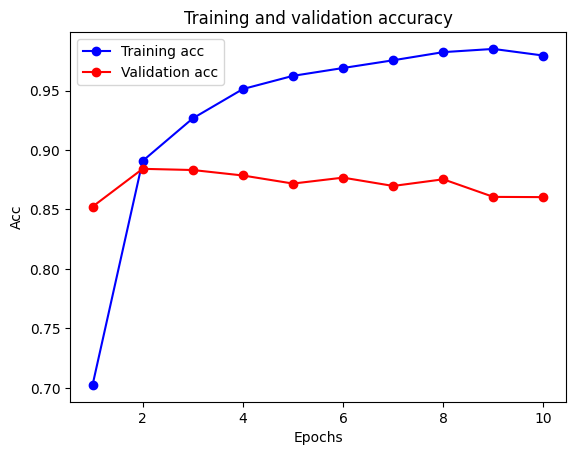

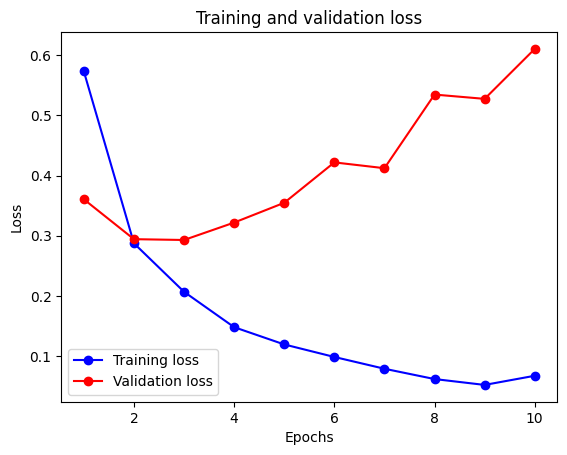

782/782 [==============================] - 25s 32ms/step - loss: 0.7258 - acc: 0.8354


In [14]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

Epoch 1/10
157/157 [==============================] - 17s 94ms/step - loss: 0.6813 - acc: 0.5541 - val_loss: 0.6500 - val_acc: 0.6444
Epoch 2/10
157/157 [==============================] - 14s 88ms/step - loss: 0.4967 - acc: 0.7760 - val_loss: 0.4217 - val_acc: 0.8158
Epoch 3/10
157/157 [==============================] - 18s 118ms/step - loss: 0.3231 - acc: 0.8730 - val_loss: 0.3675 - val_acc: 0.8466
Epoch 4/10
157/157 [==============================] - 15s 95ms/step - loss: 0.2884 - acc: 0.8882 - val_loss: 0.4151 - val_acc: 0.8430
Epoch 5/10
157/157 [==============================] - 13s 83ms/step - loss: 0.1778 - acc: 0.9373 - val_loss: 0.4501 - val_acc: 0.8050
Epoch 6/10
157/157 [==============================] - 13s 82ms/step - loss: 0.1023 - acc: 0.9698 - val_loss: 0.4587 - val_acc: 0.8220
Epoch 7/10
157/157 [==============================] - 13s 84ms/step - loss: 0.0551 - acc: 0.9864 - val_loss: 0.5002 - val_acc: 0.8320
Epoch 8/10
157/157 [==============================] - 15s 98m

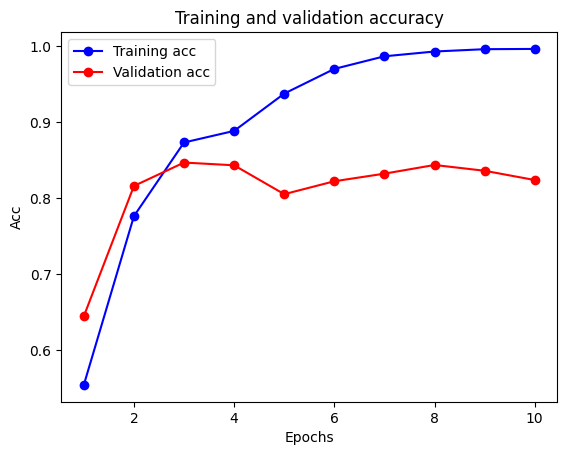

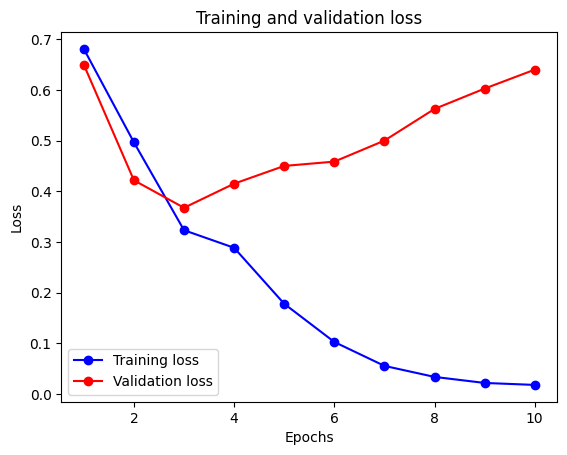

782/782 [==============================] - 12s 15ms/step - loss: 0.6482 - acc: 0.8262


In [15]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

Epoch 1/10
157/157 [==============================] - 30s 180ms/step - loss: 0.5622 - acc: 0.6890 - val_loss: 0.4060 - val_acc: 0.8192
Epoch 2/10
157/157 [==============================] - 36s 229ms/step - loss: 0.2799 - acc: 0.8895 - val_loss: 0.3171 - val_acc: 0.8676
Epoch 3/10
157/157 [==============================] - 34s 213ms/step - loss: 0.2003 - acc: 0.9293 - val_loss: 0.3221 - val_acc: 0.8764
Epoch 4/10
157/157 [==============================] - 33s 210ms/step - loss: 0.1533 - acc: 0.9470 - val_loss: 0.3469 - val_acc: 0.8788
Epoch 5/10
157/157 [==============================] - 31s 199ms/step - loss: 0.1348 - acc: 0.9538 - val_loss: 0.3515 - val_acc: 0.8702
Epoch 6/10
157/157 [==============================] - 32s 207ms/step - loss: 0.1086 - acc: 0.9649 - val_loss: 0.4031 - val_acc: 0.8630
Epoch 7/10
157/157 [==============================] - 31s 198ms/step - loss: 0.0917 - acc: 0.9700 - val_loss: 0.4759 - val_acc: 0.8558
Epoch 8/10
157/157 [==============================] - 3

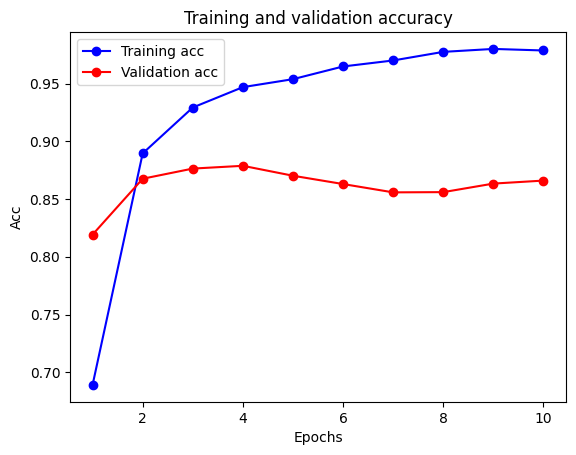

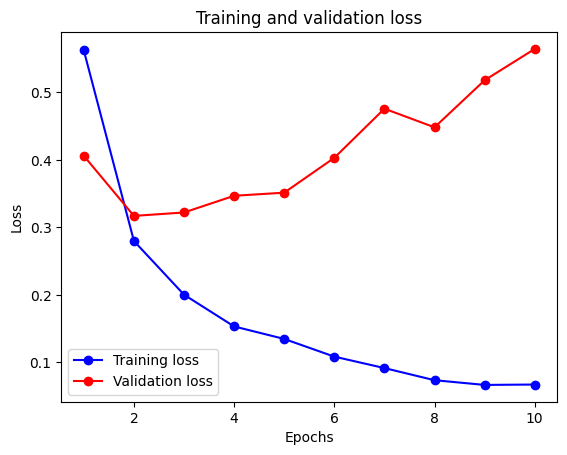

782/782 [==============================] - 22s 28ms/step - loss: 0.6226 - acc: 0.8526


In [16]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)
plot()

Epoch 1/30
40/40 [==============================] - 45s 1s/step - loss: 0.6592 - acc: 0.6478 - val_loss: 0.5191 - val_acc: 0.8134
Epoch 2/30
40/40 [==============================] - 43s 1s/step - loss: 0.3695 - acc: 0.8611 - val_loss: 0.3097 - val_acc: 0.8754
Epoch 3/30
40/40 [==============================] - 44s 1s/step - loss: 0.2256 - acc: 0.9160 - val_loss: 0.3389 - val_acc: 0.8666
Epoch 4/30
40/40 [==============================] - 41s 1s/step - loss: 0.1785 - acc: 0.9378 - val_loss: 0.3300 - val_acc: 0.8688
Epoch 5/30
40/40 [==============================] - 43s 1s/step - loss: 0.1360 - acc: 0.9543 - val_loss: 0.3393 - val_acc: 0.8766
Epoch 6/30
40/40 [==============================] - 45s 1s/step - loss: 0.1124 - acc: 0.9648 - val_loss: 0.3675 - val_acc: 0.8806
Epoch 7/30
40/40 [==============================] - 43s 1s/step - loss: 0.0872 - acc: 0.9744 - val_loss: 0.4028 - val_acc: 0.8812
Epoch 8/30
40/40 [==============================] - 43s 1s/step - loss: 0.0648 - acc: 0.98

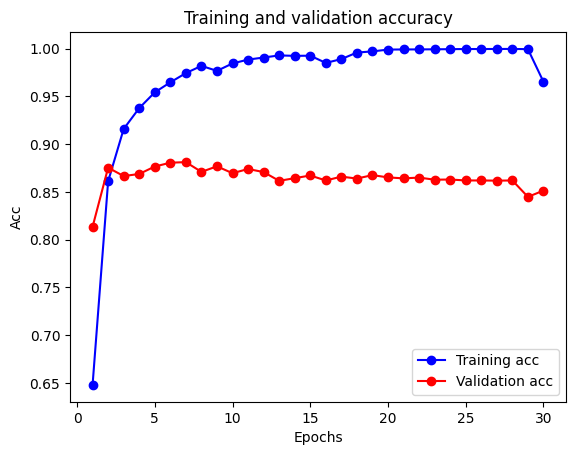

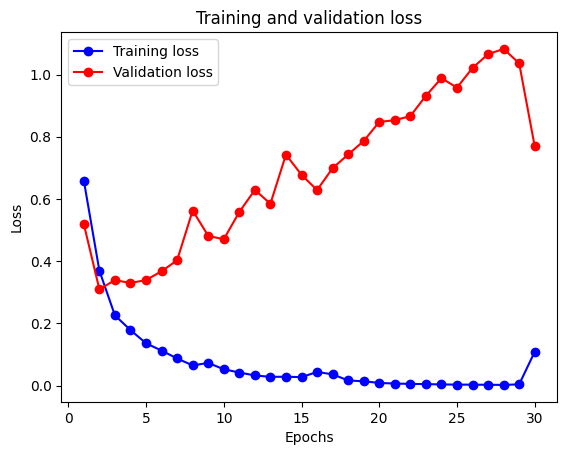

782/782 [==============================] - 26s 33ms/step - loss: 0.8192 - acc: 0.8396


In [17]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(16, activation=layers.LeakyReLU(alpha=0.2)))
model.add(Dense(8, activation=layers.LeakyReLU(alpha=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_split=0.2)
plot()

In [67]:
import tensorflow.keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, Dropout
import numpy as np
from keras.utils.np_utils import to_categorical

In [19]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=max_features)
print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('sequence padding (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train size:', input_train.shape)
print('input_test size:', input_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

8982 train sequence
2246 test sequence
sequence padding (samples x time)
input_train size: (8982, 500)
input_test size: (2246, 500)


In [20]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in input_train[0]])
decoded_newswire

'? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said p

In [21]:
def plot():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    results = model.evaluate(input_test, y_test)
    results

Epoch 1/10
57/57 [==============================] - 14s 219ms/step - loss: 3.0918 - accuracy: 0.2821 - val_loss: 2.4345 - val_accuracy: 0.3450
Epoch 2/10
57/57 [==============================] - 12s 206ms/step - loss: 2.4173 - accuracy: 0.3534 - val_loss: 2.4070 - val_accuracy: 0.3450
Epoch 3/10
57/57 [==============================] - 12s 205ms/step - loss: 2.4066 - accuracy: 0.3534 - val_loss: 2.4064 - val_accuracy: 0.3450
Epoch 4/10
57/57 [==============================] - 12s 206ms/step - loss: 2.4043 - accuracy: 0.3534 - val_loss: 2.4058 - val_accuracy: 0.3450
Epoch 5/10
57/57 [==============================] - 12s 207ms/step - loss: 2.4034 - accuracy: 0.3534 - val_loss: 2.4067 - val_accuracy: 0.3450
Epoch 6/10
57/57 [==============================] - 12s 205ms/step - loss: 2.3889 - accuracy: 0.3534 - val_loss: 2.3263 - val_accuracy: 0.3450
Epoch 7/10
57/57 [==============================] - 12s 210ms/step - loss: 2.2438 - accuracy: 0.3534 - val_loss: 2.1425 - val_accuracy: 0.3450

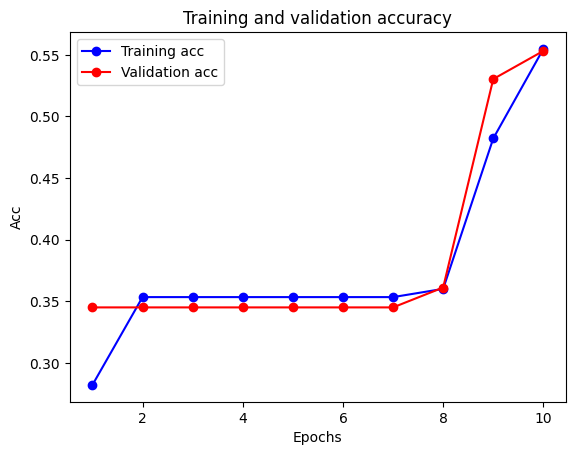

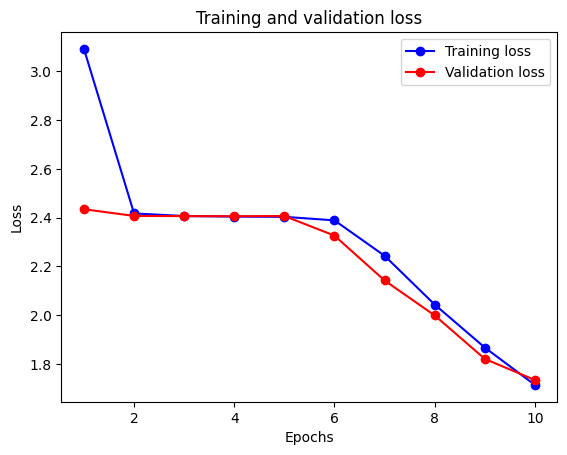

71/71 [==============================] - 2s 32ms/step - loss: 1.7754 - accuracy: 0.5423


In [22]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(input_train,
                    y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)
plot()

Epoch 1/30
113/113 [==============================] - 165s 1s/step - loss: 2.4566 - accuracy: 0.3809 - val_loss: 2.0622 - val_accuracy: 0.4814
Epoch 2/30
113/113 [==============================] - 180s 2s/step - loss: 1.9196 - accuracy: 0.4985 - val_loss: 1.7369 - val_accuracy: 0.5454
Epoch 3/30
113/113 [==============================] - 182s 2s/step - loss: 1.6829 - accuracy: 0.5610 - val_loss: 1.6349 - val_accuracy: 0.5737
Epoch 4/30
113/113 [==============================] - 183s 2s/step - loss: 1.6737 - accuracy: 0.5658 - val_loss: 1.7321 - val_accuracy: 0.5415
Epoch 5/30
113/113 [==============================] - 184s 2s/step - loss: 1.5553 - accuracy: 0.6021 - val_loss: 1.5783 - val_accuracy: 0.6155
Epoch 6/30
113/113 [==============================] - 186s 2s/step - loss: 1.3912 - accuracy: 0.6523 - val_loss: 1.6076 - val_accuracy: 0.5965
Epoch 7/30
113/113 [==============================] - 178s 2s/step - loss: 1.2384 - accuracy: 0.6881 - val_loss: 1.4754 - val_accuracy: 0.6416

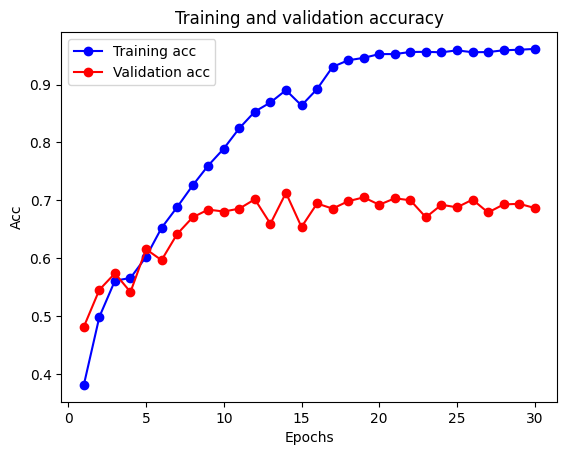

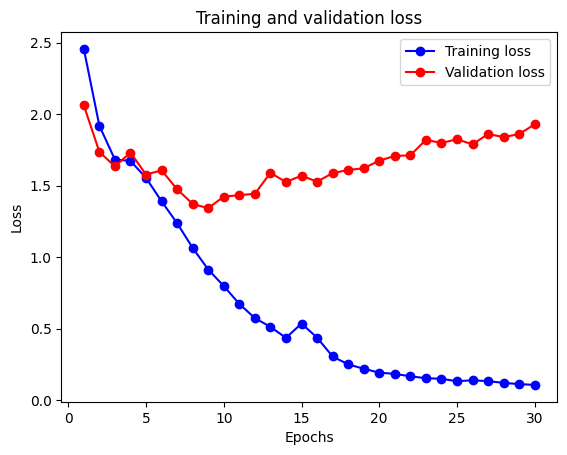

71/71 [==============================] - 9s 121ms/step - loss: 2.0270 - accuracy: 0.6679


In [23]:
model = models.Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dense(46, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(input_train,
                    y_train,
                    epochs = 30,
                    batch_size = 64,
                    validation_split=0.2)
plot()

Epoch 1/10
113/113 [==============================] - 35s 291ms/step - loss: 2.5649 - accuracy: 0.3488 - val_loss: 2.2875 - val_accuracy: 0.3534
Epoch 2/10
113/113 [==============================] - 32s 280ms/step - loss: 2.0789 - accuracy: 0.4550 - val_loss: 2.1322 - val_accuracy: 0.4268
Epoch 3/10
113/113 [==============================] - 34s 304ms/step - loss: 1.5265 - accuracy: 0.6077 - val_loss: 1.9486 - val_accuracy: 0.4558
Epoch 4/10
113/113 [==============================] - 33s 295ms/step - loss: 1.0211 - accuracy: 0.7630 - val_loss: 2.0698 - val_accuracy: 0.4674
Epoch 5/10
113/113 [==============================] - 36s 314ms/step - loss: 0.6998 - accuracy: 0.8438 - val_loss: 2.2643 - val_accuracy: 0.4418
Epoch 6/10
113/113 [==============================] - 33s 292ms/step - loss: 0.4500 - accuracy: 0.9116 - val_loss: 2.3344 - val_accuracy: 0.4580
Epoch 7/10
113/113 [==============================] - 30s 269ms/step - loss: 0.3137 - accuracy: 0.9441 - val_loss: 2.3981 - val_ac

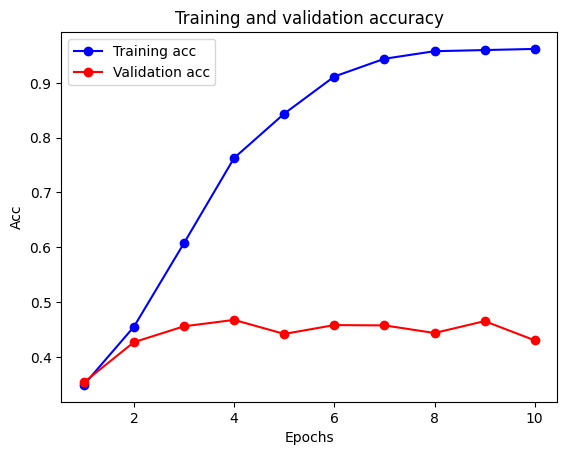

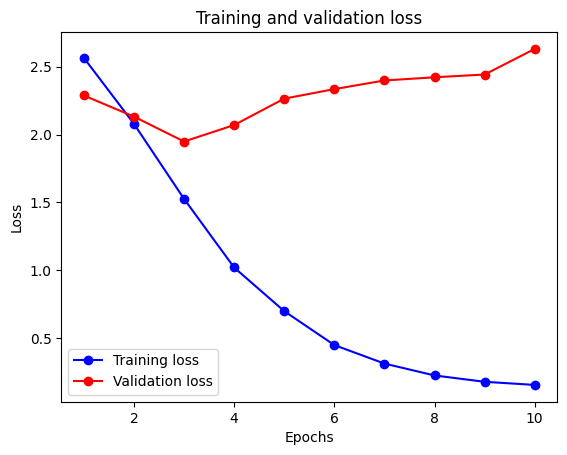

71/71 [==============================] - 2s 34ms/step - loss: 2.5970 - accuracy: 0.4488


In [24]:
model = models.Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(input_train,
                    y_train,
                    epochs = 10,
                    batch_size = 64,
                    validation_split=0.2)
plot()

Epoch 1/50
57/57 [==============================] - 115s 2s/step - loss: 2.4281 - accuracy: 0.3783 - val_loss: 2.0837 - val_accuracy: 0.4624
Epoch 2/50
57/57 [==============================] - 145s 3s/step - loss: 1.9922 - accuracy: 0.4952 - val_loss: 1.8097 - val_accuracy: 0.5470
Epoch 3/50
57/57 [==============================] - 107s 2s/step - loss: 1.7498 - accuracy: 0.5466 - val_loss: 1.6541 - val_accuracy: 0.5687
Epoch 4/50
57/57 [==============================] - 118s 2s/step - loss: 1.6171 - accuracy: 0.5802 - val_loss: 1.6008 - val_accuracy: 0.6110
Epoch 5/50
57/57 [==============================] - 110s 2s/step - loss: 1.5149 - accuracy: 0.6072 - val_loss: 1.6186 - val_accuracy: 0.5609
Epoch 6/50
57/57 [==============================] - 115s 2s/step - loss: 1.3690 - accuracy: 0.6427 - val_loss: 1.8885 - val_accuracy: 0.6049
Epoch 7/50
57/57 [==============================] - 107s 2s/step - loss: 1.3172 - accuracy: 0.6622 - val_loss: 1.4399 - val_accuracy: 0.6377
Epoch 8/50
57

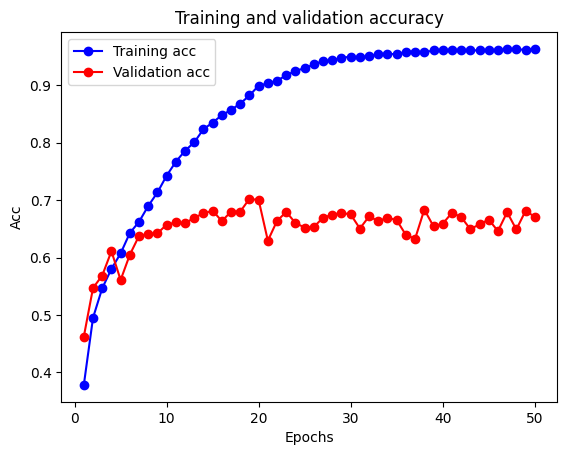

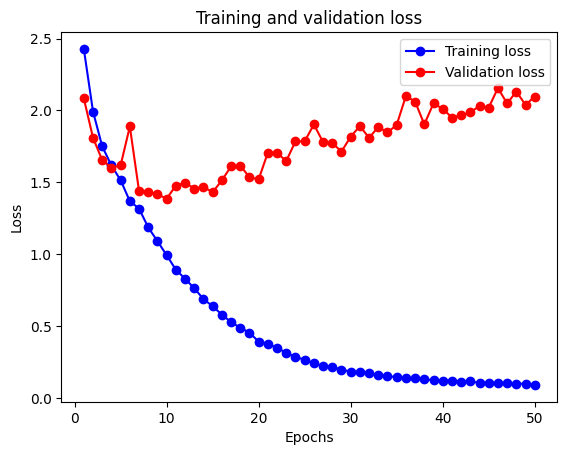

71/71 [==============================] - 9s 126ms/step - loss: 2.3426 - accuracy: 0.6483


In [25]:
model = models.Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(input_train,
                    y_train,
                    epochs = 50,
                    batch_size = 128,
                    validation_split=0.2)
plot()

Epoch 1/50
57/57 [==============================] - 30s 467ms/step - loss: 2.8865 - accuracy: 0.3467 - val_loss: 2.2363 - val_accuracy: 0.4602
Epoch 2/50
57/57 [==============================] - 26s 456ms/step - loss: 2.1616 - accuracy: 0.4928 - val_loss: 1.9773 - val_accuracy: 0.4914
Epoch 3/50
57/57 [==============================] - 26s 456ms/step - loss: 1.8880 - accuracy: 0.5301 - val_loss: 2.5885 - val_accuracy: 0.3456
Epoch 4/50
57/57 [==============================] - 26s 453ms/step - loss: 1.7476 - accuracy: 0.5459 - val_loss: 1.8210 - val_accuracy: 0.5442
Epoch 5/50
57/57 [==============================] - 26s 454ms/step - loss: 1.6090 - accuracy: 0.5786 - val_loss: 1.8462 - val_accuracy: 0.5042
Epoch 6/50
57/57 [==============================] - 26s 453ms/step - loss: 1.4849 - accuracy: 0.6045 - val_loss: 2.0764 - val_accuracy: 0.4836
Epoch 7/50
57/57 [==============================] - 26s 452ms/step - loss: 1.3927 - accuracy: 0.6301 - val_loss: 1.7470 - val_accuracy: 0.5693

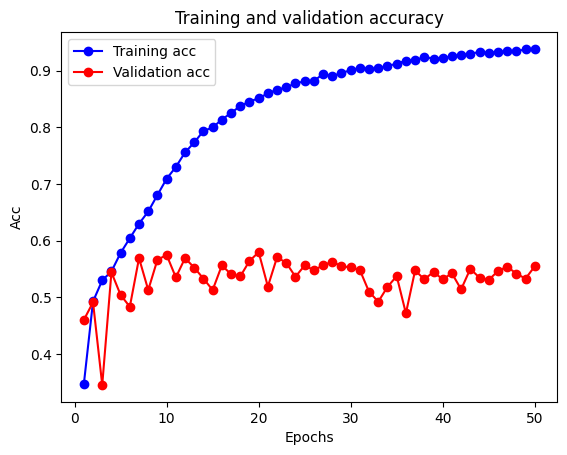

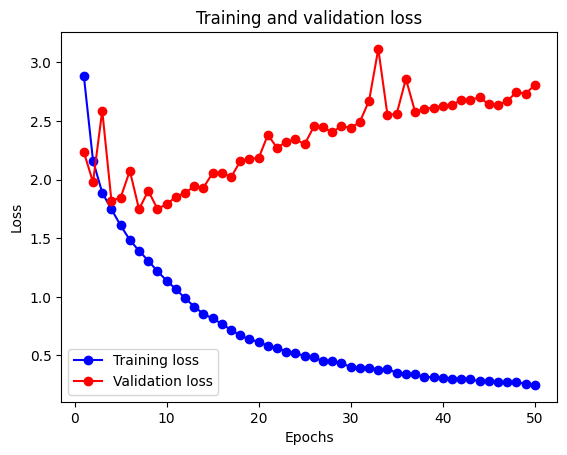

71/71 [==============================] - 5s 72ms/step - loss: 2.8835 - accuracy: 0.5396


In [26]:
model = models.Sequential()
model.add(Embedding(max_features, 100))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(input_train,
                    y_train,
                    epochs = 50,
                    batch_size = 128,
                    validation_split=0.2)
plot()

In [31]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [32]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [133]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('Fold being processed #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Fold being processed # 0
Fold being processed # 1
Fold being processed # 2
Fold being processed # 3


In [134]:
all_scores

[2.072744131088257, 2.5671470165252686, 2.8472957611083984, 2.6238789558410645]

In [135]:
np.mean(all_scores)

2.527766466140747

In [23]:
from tensorflow.keras import backend as K

In [137]:
K.clear_session()

In [138]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('Fold being processed', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Fold being processed 0
Fold being processed 1
Fold being processed 2
Fold being processed 3


In [139]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [140]:
import matplotlib.pyplot as plt

In [141]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

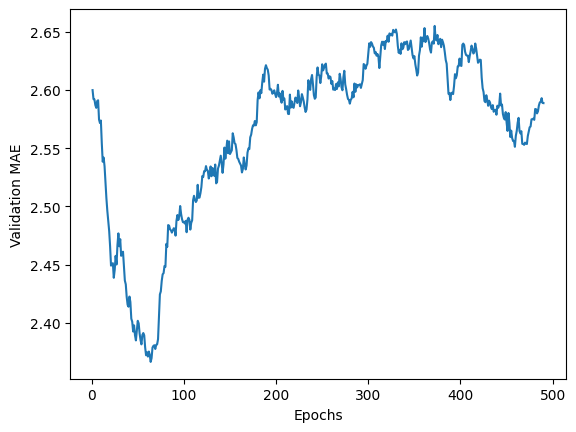

In [142]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [143]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 16.4182 - mae: 2.5256


In [144]:
test_mse_score, test_mae_score 

(16.41823959350586, 2.525599241256714)

In [145]:
import numpy as np

In [ ]:
from keras.layers import LSTM
from keras import models
from keras import layers

def build_model_lstm():
    model = models.Sequential()
    model.add(Embedding(train_data.shape[1], 64))
    model.add(layers.Dense(64, activation='tanh',
                           input_shape=(train_data.shape[1], )))
    model.add(LSTM(64, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('Fold being processed', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model_lstm()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Fold being processed 0
Fold being processed 1
Fold being processed 2
Fold being processed 3


In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


 32/102 [========>.....................] - ETA: 0s

In [ ]:
test_mse_score, test_mae_score

(27.806640886792948, 3.9203564886953317)

In [ ]:
model = build_model_lstm()

model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mse_score, test_mae_score


 32/102 [========>.....................] - ETA: 0s

(21.00148163589777, 3.4331585285710355)

In [ ]:
from keras.layers import GRU

def build_model_gru():
    model = models.Sequential()
    model.add(Embedding(train_data.shape[1], 64))
    model.add(layers.Dense(64, activation='tanh',
                           input_shape=(train_data.shape[1], )))
    model.add(GRU(64, activation='tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('Fold being processed', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model_gru()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Fold being processed 0
Fold being processed 1
Fold being processed 2
Fold being processed 3


In [ ]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


 32/102 [========>.....................] - ETA: 0s

In [ ]:
test_mse_score, test_mae_score 

(20.012982490015965, 3.470546371796552)

In [ ]:
model = build_model_gru()

model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mse_score, test_mae_score


 32/102 [========>.....................] - ETA: 1s

(32.651428970636104, 4.351923390930774)